<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/project/python_advance/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존자 추정문제

## 1. 문제정의

세계에서 가장 유명한 비극적인 사고 중 하나인 타이나닉 호 침몰 사건, 그 사건의 데이터를 분석하여 생존율에 영향을 끼친 요인이 무엇이 있었는지, 어떤 데이터가 가장 유의적인 영향을 끼쳤는지 분석해 본다.

## 2. 데이터 수집


### 2-1. 데이터 불러오기

> 타이타닉 데이터는 캐글의 데이터를 가지고 온다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/이어드림/advance/프로젝트오리엔테이션/titanic.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head(5)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2-2. 데이터 설명










```
pclass : 객실 등급 (1 = 1st, 2 = 2nd, 3 = 3rd)
survived : 생존 유무 (0 = No, 1 =Yes)
name : 칭호를 포함한 이름
sex : 성별 (female, male)
age : 나이 
sibsp : 형제 혹은 부부의 수
parch : 부모, 혹은 자녀의 수
ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
fare : 지불한 운임
cabin : 객실정보 
embarked : 선착장정보 (C = Cherbourg, Q = Queenstown, S = Southampton)
boat : 탈출한 보트가 있다면 boat 번호
body : 사망자의 시신 수습 후 부여한 일련번호
home : 출신
```
목표변수 : survived(범주형 데이터)  
독립변수  
> 범주형 데이터 : pclass, name, sex, ticket, cabin, embarked, home, boat, body

> 연속형 데이터 : age, sibsp, parch, fare

## 3. 원본데이터 탐색


### 3-1 전체 데이터 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### 3-2 결측치 처리

In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

> 변수 <code>cabin, boat, body, home.dest</code> 이 4개의 변수는 결측치의 크기가 너무 크기에 분석에 포함할 경우 불필요한 오차를 빚을 가능성이 높기 때문에, 분석에서 제거한다.

> 변수 <code>age</code>는 *평균값*으로 대체한다.

> 변수 <code>fare, embarked</code>는 결측치의 갯수가 작기에 해당 행을 제거한다.

In [ ]:
df[['age','fare','cabin','embarked','boat','body','home.dest']]

,age,fare,cabin,embarked,boat,body,home.dest
0,29.00,211.3375,B5,S,2,NaN,"St Louis, MO"
1,0.92,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2.00,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,30.00,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,25.00,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,14.50,14.4542,NaN,C,NaN,328.0,NaN
1305,NaN,14.4542,NaN,C,NaN,NaN,NaN
1306,26.50,7.2250,NaN,C,NaN,304.0,NaN
1307,27.00,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
df['age'].fillna(df['age'].mean(),inplace=True) # age 평균 대체 29.88
df.drop(df.index[df['fare'].isnull()], inplace=True) # fare 결측치 제거
df.drop(df.index[df['embarked'].isnull()], inplace=True) # embarked 결측치 제거
df.drop(['cabin', 'boat', 'body', 'home.dest'],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   int64  
 6   parch     1306 non-null   int64  
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.2+ KB


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,2.296325,0.381317,29.826883,0.50000,0.385911,33.223956
std,0.837037,0.485896,12.837284,1.04258,0.866357,51.765986
min,1.000000,0.000000,0.170000,0.00000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.00000,0.000000,7.895800
50%,3.000000,0.000000,29.881138,0.00000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.00000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200


### 3-3. 상관계수 확인

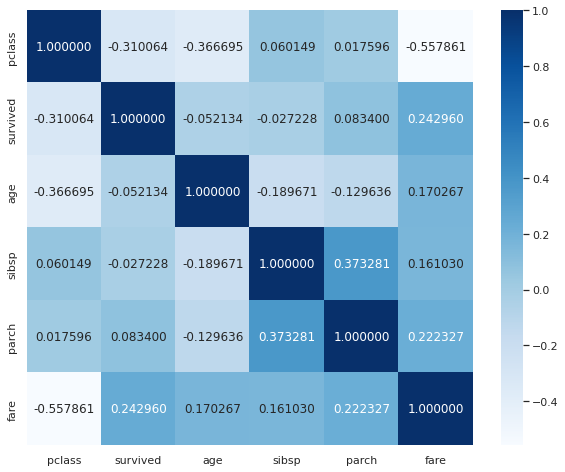

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.set(rc={'figure.figsize':(12, 5)})
sns.heatmap(df.corr(), annot=True, fmt='f', cmap="Blues")


>원본 데이터의 상관계수 분석으로 보았을 때, <code>생존률(survived)</code>와 유의미하게 연관된 변수는 <code>pclass(-0.310064)</code>와 <code>fare(0.242960)</code>이다.  
이외에 눈에띄는 점은 <code>나이(age)</code> 변수의 생존률 상관계수가 -0.05 수준으로 생각보다 낮게 나왔다는 점이다. 나이가 높을수록 높은 *pclass*와 *fare* 변수를 갖음에도 생존률과 나이의 관계는 거의 없다고 나온 결과는 조금 더 분석할 만한 가치가 있어 보인다.

## 4. 데이터 가공 및 분석

### 4-1 성별과 생존률

>가정 : 남자는 여자보다 신체적인 조건이 우위에 있음으로 남성이 여성보다 더 높은 생존률을 보일 것이다.

In [ ]:
df[['sex','survived']]
sex_num = df['survived'].groupby(df['sex']).sum()

#### 4-1-1 성별 생존자 숫자 비교
> 성별
>- 남성 : 161명
>- 여성 : 337명

> 여성의 생존자 수가 남성의 생존자수보다 2배 이상 많다. 

In [ ]:
f_sur = sex_num[0]
m_sur = sex_num[1]
sex_num

sex
female    337
male      161
Name: survived, dtype: int64

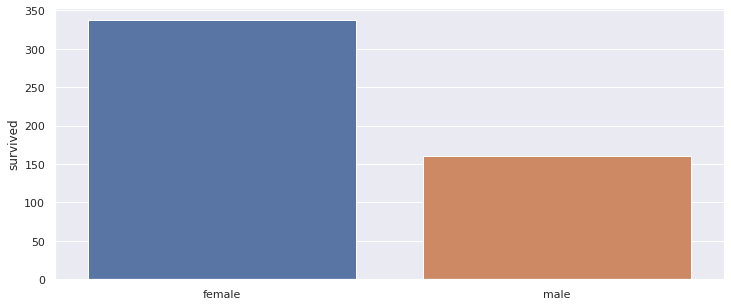

In [ ]:
sns.barplot(x=df['sex'].unique(),y=sex_num)

#### 4-1-2 성별 생존률 비교( 생존자 수/탑승자 수)

> 성별 생존률
>- 남성: 0.19098457888493475 ( 161명/842명)
>- 여성: 0.7262931034482759 ( 337명/464명)

> 여성의 생존률이 남성의 약 4배에 가까울정도로 매우 높았다.

In [ ]:
m_count = df['sex'][df['sex']=='male'].count()
f_count = df['sex'][df['sex']=='female'].count()
m_count, f_count

(842, 464)

In [ ]:
sex_sur = [f_sur/f_count,m_sur/m_count]
sex_sur

[0.7262931034482759, 0.19121140142517815]

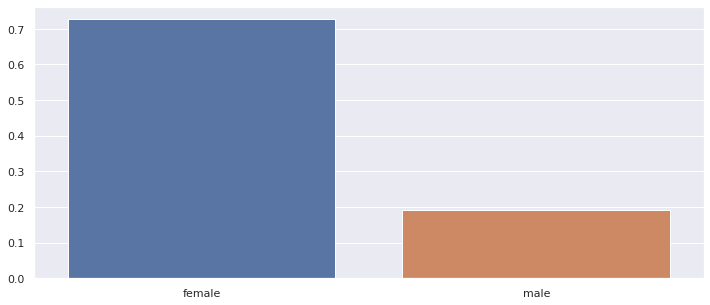

In [ ]:
sns.barplot(x=df['sex'].unique(),y=sex_sur)

#### 4-1-3 성별과 다른 요인들간의 비교분석 (pclass, fare)


In [ ]:
df['sex'].groupby(df['pclass']).count()
# 클래스별 남녀 생존률
pd.pivot_table(data=df,index='pclass',columns='sex',aggfunc = 'mean')[['survived']] #[['age','fare','survived']]

survived          
sex       female      male
pclass                    
1       0.964789  0.340782
2       0.886792  0.146199
3       0.490741  0.152439

In [ ]:
df.loc[df['sex']=='male','fare'].mean()
df['fare'].groupby(df['sex']).mean()

# 생존자의 남녀 평균 fare
df.loc[df['survived']==1,:]['fare'].groupby(df['sex']).mean()

sex
female    54.994523
male      37.189053
Name: fare, dtype: float64

### 4-2 나이와 생존율

#### 4-2-1 연령별 생존률

> 탑승자의 나이를 아래의 기준으로 5등분으로 쪼갠 다음 가장 생존률이 높은 연령대를 구한다.
- BABY : age < 4
- KID : 4 <= age < 16
- YOUNG : 16 <= age < 30
- SENIOR : 30 <= age < 50
- OLDER : 50 <= age



In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S


In [ ]:
def age_func(age):
    if age < 4:
        return "BABY"
    elif age < 16:
        return "KID"
    elif age < 30:
        return "YOUNG"
    elif age < 50:
        return "SEINOR"
    else:
        return "OLDER"
df['age'].map(age_func).value_counts()


YOUNG     717
SEINOR    366
OLDER     108
KID        74
BABY       41
Name: age, dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1['age_grade'] = df['age'].map(age_func)
df1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_grade
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,YOUNG
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,S,BABY
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,BABY
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,SEINOR
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,YOUNG
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,KID
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,C,YOUNG
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,YOUNG
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,YOUNG


YOUNG     717
SEINOR    366
OLDER     108
KID        74
BABY       41
Name: age_grade, dtype: int64


<BarContainer object of 5 artists>

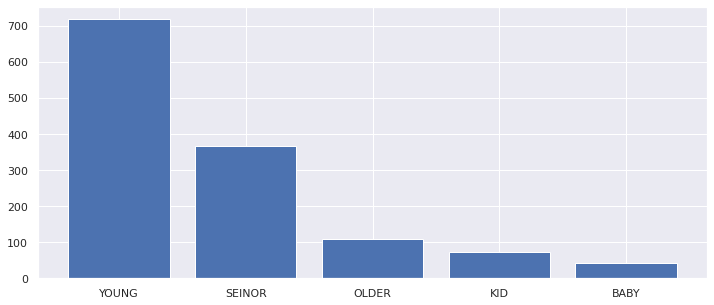

In [ ]:
# 연령별 탑승객 수
print(df1['age_grade'].value_counts())
plt.bar(x=df1['age_grade'].value_counts().index, height=df1['age_grade'].value_counts())

age_grade
YOUNG     240
SEINOR    149
OLDER      43
KID        40
BABY       26
Name: survived, dtype: int64


<BarContainer object of 5 artists>

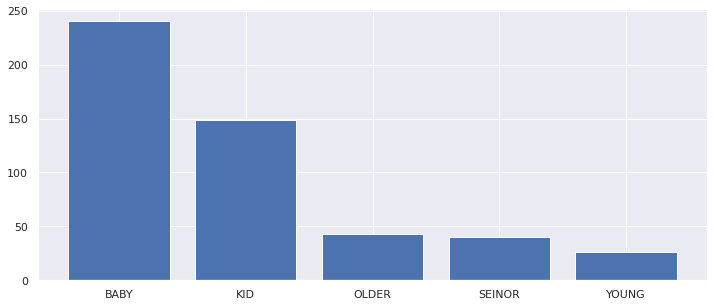

In [ ]:
# 연령별 생존자
print(df1['survived'].groupby(df1['age_grade']).sum().sort_values(ascending=False))
plt.bar(x=df1['survived'].groupby(df1['age_grade']).sum().index, height=df1['survived'].groupby(df1['age_grade']).sum().sort_values(ascending=False))

In [ ]:
# 연령별 생존률( 연령별 생존자/연령별 탑승객)
age_sur = df1['survived'].groupby(df1['age_grade']).sum().sort_values(ascending=False)
# age_sur.div(df1['survived'].value_counts())
age_sur_per = age_sur/df1['age_grade'].value_counts()
age_sur_per
# type(age_sur)
# type(df1['age_grade'].value_counts())

age_grade
YOUNG     0.334728
SEINOR    0.407104
OLDER     0.398148
KID       0.540541
BABY      0.634146
dtype: float64

<BarContainer object of 5 artists>

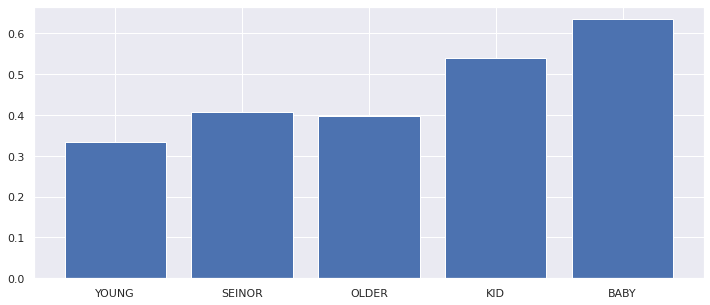

In [ ]:
plt.bar(x=age_sur_per.index, height=age_sur_per)

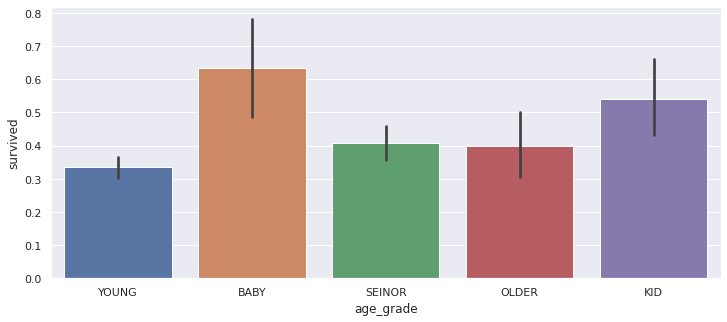

In [ ]:
sns.barplot(data=df1, x='age_grade', y='survived')

> 가장 생존률이 높은 연령대는 BABY 였으며 KID, OLDER 순이었다. 가장 생존률이 낮은 연령대는 YOUNG 즉 10대 후반부터 20대 였다.  
> 이러한 점을 살펴보면 청년층보다 노약자가 먼저 대피되어 탈출에 성공했던 것으로 파악된다.

#### 4-2-2 연령별 생존률


> 가정 : 4-2-1 분석에서 노약자의 생존률이 높으며, 오히려 가장 신체적으로 생존우위에 있는 YOUNG 연령대의 생존률이 가장 낮은 것이 파악되었다. 그렇다면 연령별 생존률의 성비는 어떠할까? 위의 분석들에 따르면 여성이 남성보다 생존률이 높았으며, 어리고 나이가 많은 사람이 더 생존확률이 높았다.

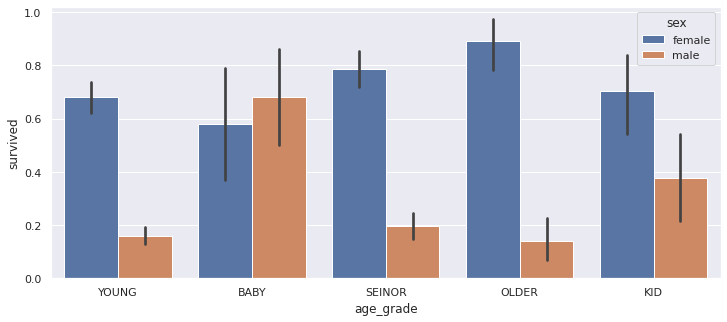

In [ ]:
# 각 연령대별 남녀 생존률
sns.barplot(data=df1, x='age_grade', y='survived', hue='sex')

In [ ]:
df1[df1['age_grade']=='BABY']['survived'].count()
df1[df1['age_grade']=='BABY']['sex'].value_counts()
df1[ (df1['age_grade']=='BABY') & (df1['sex'] =='female') ]['survived'].value_counts()
# df1[ (df1['age_grade']=='BABY') & (df1['sex'] =='female') ]['survived'].value_counts()[0]/ df1[df1['age_grade']=='BABY']['sex'].value_counts()[1]
df1[ (df1['age_grade']=='BABY') & (df1['sex'] =='female') ]['survived'].value_counts()/df1[ (df1['age_grade']=='BABY') & (df1['sex'] =='female') ]['survived'].value_counts().sum()
df1[ (df1['age_grade']=='SEINOR') & (df1['sex'] =='female') ]['survived'].value_counts()/df1[ (df1['age_grade']=='SEINOR') & (df1['sex'] =='female') ]['survived'].value_counts().sum()

1    0.78626
0    0.21374
Name: survived, dtype: float64

### 4-3 신분과 생존률

#### 4-3-1 호칭 및 신분별 생존률

In [ ]:
df1['class'] = df['name'].str.extract('([A-Za-z]+)\.', expand=False)
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_grade,class
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,YOUNG,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,BABY,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,BABY,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,SEINOR,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,YOUNG,Mrs


In [ ]:
df['name'].str.extract('([A-Za-z]+\.)', expand=False)

0         Miss.
1       Master.
2         Miss.
3           Mr.
4          Mrs.
         ...   
1304      Miss.
1305      Miss.
1306        Mr.
1307        Mr.
1308        Mr.
Name: name, Length: 1306, dtype: object

In [ ]:
df1['class'].value_counts()

Mr          756
Miss        259
Mrs         196
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Jonkheer      1
Countess      1
Don           1
Mme           1
Lady          1
Name: class, dtype: int64

In [ ]:
df2 = df1.copy()

In [ ]:
li = ['Col','Mlle','Ms','Major','Capt','Sir','Dona','Jonkheer','Countess','Don','Mme','Lady']
for i in li:
    df2.drop(df2.index[df2['class'] == i],inplace=True)
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_grade,class
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,YOUNG,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,S,BABY,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,BABY,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,SEINOR,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,YOUNG,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,KID,Miss
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,C,YOUNG,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,YOUNG,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,YOUNG,Mr


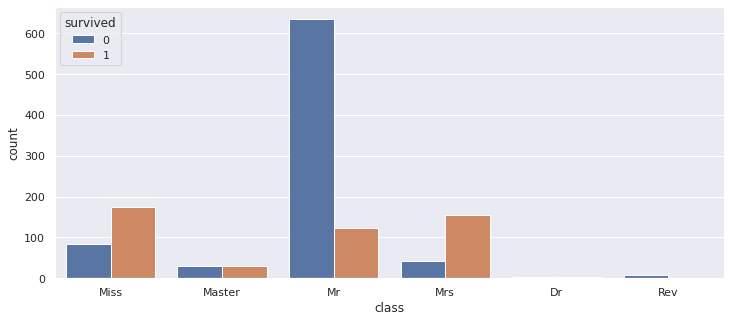

In [ ]:
sns.countplot(data=df2, x='class',hue='survived')

In [ ]:
df3 = df1.copy()

In [ ]:
li = ['Master','Dr','Rev','Col','Mlle','Ms','Major','Capt','Sir','Dona','Jonkheer','Countess','Don','Mme','Lady']
# for i in li:
cnt = 0
dfli = []
for i in li:
    dfli.append(df3[df3['class'] == i])
    
resultdf = pd.concat(dfli)

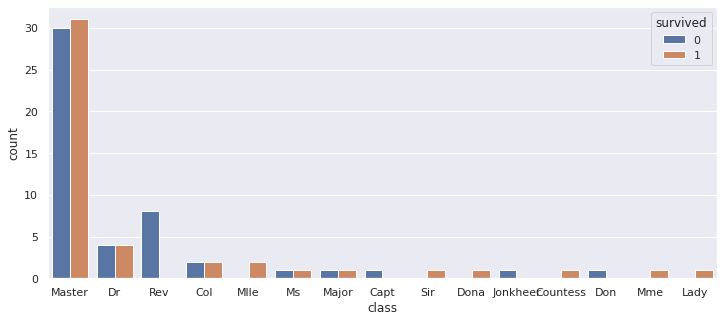

In [ ]:
sns.countplot(data=resultdf,x='class',hue='survived')

#### 4-3-2 같은 성(family name)을 지닌 가족별 생존률

> 같은 성 혹은 같은 티켓을 가진 동승자가 있으면 특히 여성의 생존률이 더 높을 것이다.

In [39]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_grade,class
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,YOUNG,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,BABY,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,BABY,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,SEINOR,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,YOUNG,Mrs


In [49]:
df2['family_name'] = df['name'].str.extract("([A-Za-z']+)", expand=False)

In [50]:
df2['family_name'].value_counts()

Sage         11
Andersson    11
Goodwin       8
Asplund       8
Davies        7
             ..
Otter         1
Oxenham       1
Padro         1
Pain          1
Zimmerman     1
Name: family_name, Length: 843, dtype: int64

In [105]:
df2['family_name'].value_counts()[df2['family_name'].value_counts() >1].index

Index(['Sage', 'Andersson', 'Goodwin', 'Asplund', 'Davies', 'Ford', 'Brown',
       'Fortune', 'Smith', 'Carter',
       ...
       'Assaf', 'Barbara', 'Beckwith', 'Baxter', 'Andrews', 'Arnold',
       'Zakarian', 'Dennis', 'Marvin', 'Lines'],
      dtype='object', length=238)

In [106]:
family = df2['family_name'].value_counts()[df2['family_name'].value_counts() >1].index
dfli =[]
for i in list(family):
    # print(df2[df2['ticket'] == i])
    dfli.append(df2[df2['family_name'] == i])
df_family = pd.concat(dfli)
df_family

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_grade,class,family_name
1170,3,0,"Sage, Master. Thomas Henry",male,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Master,Sage
1171,3,0,"Sage, Master. William Henry",male,14.500000,8,2,CA. 2343,69.55,S,KID,Master,Sage
1172,3,0,"Sage, Miss. Ada",female,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Miss,Sage
1173,3,0,"Sage, Miss. Constance Gladys",female,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Miss,Sage
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Miss,Sage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,3,0,"Dennis, Mr. William",male,36.000000,0,0,A/5 21175,7.25,S,SEINOR,Mr,Dennis
197,1,0,"Marvin, Mr. Daniel Warner",male,19.000000,1,0,113773,53.10,S,YOUNG,Mr,Marvin
198,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.000000,1,0,113773,53.10,S,YOUNG,Mrs,Marvin
187,1,1,"Lines, Miss. Mary Conover",female,16.000000,0,1,PC 17592,39.40,S,YOUNG,Miss,Lines


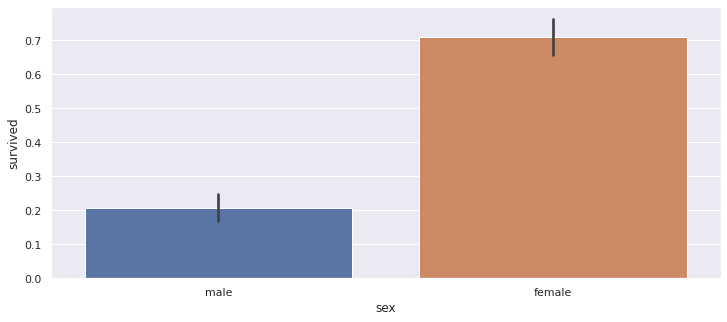

In [107]:
sns.barplot(data=df_family, x='sex',y='survived')

### 4-4 티켓과 생존률


In [86]:
double_ticket = df2['ticket'].value_counts()[df2['ticket'].value_counts() >1].index
df2.loc[:,:]
# df2['ticket']  list(double_ticket)
dfli =[]
for i in list(double_ticket):
    # print(df2[df2['ticket'] == i])
    dfli.append(df2[df2['ticket'] == i])
df_ticket = pd.concat(dfli)
df_ticket

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_grade,class,family_name
1170,3,0,"Sage, Master. Thomas Henry",male,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Master,Sage
1171,3,0,"Sage, Master. William Henry",male,14.500000,8,2,CA. 2343,69.55,S,KID,Master,Sage
1172,3,0,"Sage, Miss. Ada",female,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Miss,Sage
1173,3,0,"Sage, Miss. Constance Gladys",female,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Miss,Sage
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.881138,8,2,CA. 2343,69.55,S,YOUNG,Miss,Sage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000000,1,0,113776,66.60,S,YOUNG,Mrs,Pears
209,1,1,"Mock, Mr. Philipp Edmund",male,30.000000,1,0,13236,57.75,C,SEINOR,Mr,Mock
257,1,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.000000,1,0,13236,57.75,C,SEINOR,Mrs,Schabert
246,1,0,"Rothschild, Mr. Martin",male,55.000000,1,0,PC 17603,59.40,C,OLDER,Mr,Rothschild


In [94]:
df_ticket['ticket'].value_counts()
df_ticket['survived'].groupby(df['ticket']).sum()

ticket
110152                2
110413                2
110465                0
110813                1
111361                2
                     ..
SOTON/O.Q. 3101315    0
STON/O2. 3101279      1
W./C. 6607            0
W./C. 6608            0
W.E.P. 5734           1
Name: survived, Length: 212, dtype: int64

In [98]:
# 같은 티켓을 가진 사람 모두가 생존할 확률
sum(df_ticket['survived'].groupby(df['ticket']).sum()/df_ticket['ticket'].value_counts() == 1)/212


0.3018867924528302

In [102]:
df_ticket[ (df_ticket['sex']=='female') & (df_ticket['survived']==1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_grade,class,family_name
35,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,C,SEINOR,Miss,Bowen
66,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C,SEINOR,Miss,Chaudanson
250,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C,YOUNG,Miss,Ryerson
251,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,C,YOUNG,Miss,Ryerson
253,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C,SEINOR,Mrs,Ryerson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,S,OLDER,Mrs,Appleton
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,S,OLDER,Mrs,Brown
227,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,S,YOUNG,Mrs,Pears
257,1,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.0,1,0,13236,57.7500,C,SEINOR,Mrs,Schabert


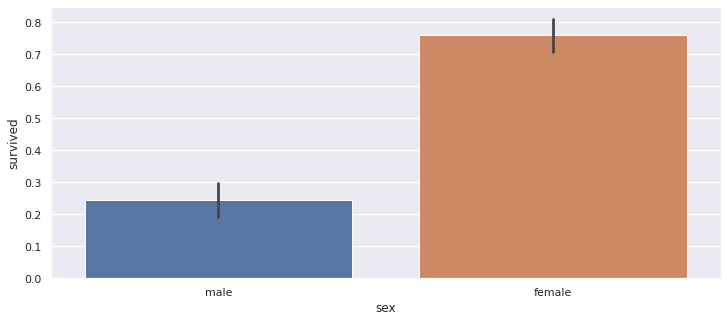

In [103]:
sns.barplot(data=df_ticket, x='sex',y='survived')